# **SEMA-SCDG**

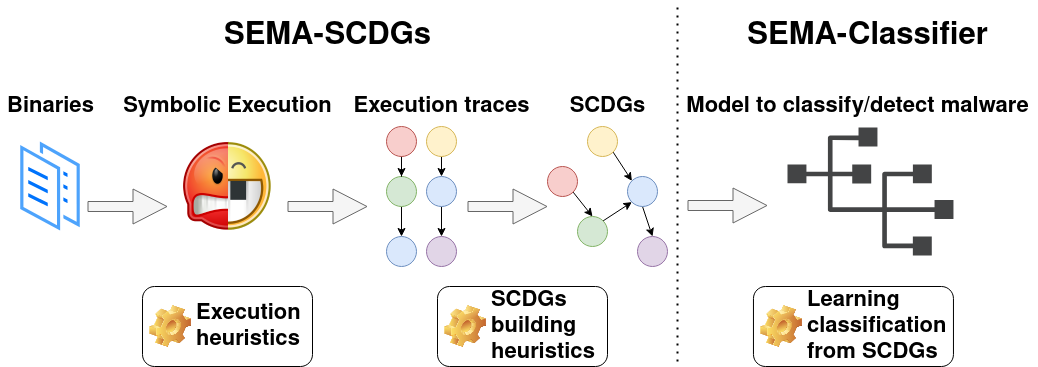

## **Using SEMA toolchain**

In [1]:
import os
os.chdir('..')
!python3 SemaSCDG.py -h

usage: SemaSCDG.py [-h] config_file

SCDG module arguments

positional arguments:
  config_file  The relative path to the config file

options:
  -h, --help   show this help message and exit


### **Extract SCDG**
We extract SCDGs from binaries of example code. We use the config file at ./configs/config_tutorial.ini which specifies to use the CDFS exploration techniques, the json output type and the name of the output directory should be Tutorial_output. The analysed binary is set as Tutorial/DATA/Example_SEMA_code1.exe

In [2]:
!python3 SemaSCDG.py Tutorial/config_tutorial.ini

INFO - 2024-05-20 10:53:44,800 - SemaSCDG - Results wil be saved into : database/SCDG/runs/Tutorial_output/
INFO - 2024-05-20 10:53:44,800 - SemaSCDG - You decide to analyse a single binary: Tutorial/DATA/Example_SEMA_code1.exe
INFO - 2024-05-20 10:53:44,803 - SemaSCDG - 
------------------------------------------------------------
--- Building SCDG of Binaryfamily/Example_SEMA_code1.exe ---
------------------------------------------------------------
INFO    | 2024-05-20 10:53:44,803 | angr.project | Loading binary Tutorial/DATA/Example_SEMA_code1.exe
WARNING | 2024-05-20 10:53:44,811 | angr.project | Disabling IRSB translation cache because support for self-modifying code is enabled.
INFO    | 2024-05-20 10:53:46,386 | angr.project | Using builtin SimProcedure for unresolved DeleteCriticalSection from kernel32.dll
INFO    | 2024-05-20 10:53:46,387 | angr.project | Using builtin SimProcedure for unresolved EnterCriticalSection from kernel32.dll
INFO    | 2024-05-20 10:53:46,387 | angr

We could observe the JSON file obtained thanks to SEMA-SCDG in database/runs/Tutorial_output.
Interesting trace from this JSON is represented below where you could find the calls which will print "I'm evil".

{"status": "deadendend", "trace": 
        
        [{"name": "main", "args": ["Example_SEMA_code1.exe"], "addr": 4199520, "ret": "symbolic", "addr_func": 4199520},
        {"name": "GetModuleHandleA", "args": ["libgcc_s_dw2-1.dll"], "addr_func": "5242916", "addr": 4199247, "ret": 6295592}, 
        {"name": "LoadLibraryA", "args": ["libgcc_s_dw2-1.dll"], "addr_func": "5242940", "addr": 4199272, "ret": 6295592}, 
        {"name": "GetProcAddress", "args": [6295592, "__register_frame_info"], "addr_func": "5242920", "addr": 4199296, "ret": "<BV32 retval_GetProcAddress_32767_32>"}, 
        {"name": "GetProcAddress", "args": [6295592, "__deregister_frame_info"], "addr_func": "5242920", "addr": 4199317, "ret": "<BV32 retval_GetProcAddress_32768_32>"}, 
        {"name": "atexit", "args": [4199472], "addr_func": "5243032", "addr": 4199425, "ret": "<BV32 retval_atexit_32769_32>"}, 
        {"name": "atexit", "args": [4201040], "addr_func": "5243032", "addr": 4201126, "ret": "<BV32 retval_atexit_32770_32>"}, 
        {"name": "GetTickCount", "args": [], "addr_func": "5242924", "addr": 4199542, "ret": "<BV32 retval_GetTickCount_32771_32{UNINITIALIZED}>"}, 
        {"name": "Sleep", "args": [5000], "addr_func": "5242948", "addr": 4199564, "ret": "None"}, 
        {"name": "GetTickCount", "args": [], "addr_func": "5242924", "addr": 4199572, "ret": "<BV32 retval_GetTickCount_32772_32{UNINITIALIZED}>"}, 
        {"name": "IsDebuggerPresent", "args": [], "addr_func": "5242932", "addr": 4199616, "ret": "<BV32 retval_IsDebuggerPresent_32773_32>"}, 
        {"name": "LoadLibraryA", "args": ["msvcrt.dll"], "addr_func": "5242940", "addr": 4199711, "ret": 6295604}, 
        {"name": "GetProcAddress", "args": [6295604, "strcat"], "addr_func": "5242920", "addr": 4199736, "ret": 6295608}, 
        {"name": "strcat", "args": ["", "I'm "], "addr_func": "6295608", "addr": 4199764, "ret": "I'm "}, 
        {"name": "strcat", "args": ["I'm ", "evil !!"], "addr_func": "6295608", "addr": 4199783, "ret": "I'm evil !!"}, 
        {"name": "MessageBoxA", "args": [0, "I'm evil !!", "", 0], "addr_func": "5243096", "addr": 4199815, "ret": 1}, 
        {"name": "exit", "args": [], "addr_func": "5243040", "addr": 4199830, "ret": "None"}]}


Similarly, we apply SEMA-SCDG on the second code example :

In [4]:
import configparser
config = configparser.ConfigParser()
config.read("Tutorial/config_tutorial.ini")
config.set('SCDG_arg', "binary_path", "Tutorial/DATA/Example_SEMA_code2.exe")

with open("Tutorial/config_tutorial.ini", 'w') as configfile:
        config.write(configfile)

!python3 SemaSCDG.py Tutorial/config_tutorial.ini

# Restore previous value
config = configparser.ConfigParser()
config.read("Tutorial/config_tutorial.ini")
config.set('SCDG_arg', "binary_path", "Tutorial/DATA/Example_SEMA_code1.exe")

with open("Tutorial/config_tutorial.ini", 'w') as configfile:
        config.write(configfile)

INFO - 2024-05-20 10:54:50,475 - SemaSCDG - Results wil be saved into : database/SCDG/runs/Tutorial_output/
INFO - 2024-05-20 10:54:50,476 - SemaSCDG - You decide to analyse a single binary: Tutorial/DATA/Example_SEMA_code2.exe
INFO - 2024-05-20 10:54:50,478 - SemaSCDG - 
------------------------------------------------------------
--- Building SCDG of Binaryfamily/Example_SEMA_code2.exe ---
------------------------------------------------------------
INFO    | 2024-05-20 10:54:50,478 | angr.project | Loading binary Tutorial/DATA/Example_SEMA_code2.exe
WARNING | 2024-05-20 10:54:50,487 | angr.project | Disabling IRSB translation cache because support for self-modifying code is enabled.
INFO    | 2024-05-20 10:54:52,014 | angr.project | Using builtin SimProcedure for unresolved DeleteCriticalSection from kernel32.dll
INFO    | 2024-05-20 10:54:52,014 | angr.project | Using builtin SimProcedure for unresolved EnterCriticalSection from kernel32.dll
INFO    | 2024-05-20 10:54:52,015 | angr

We observe the same kind of behavior in the JSON file :

{"status": "deadendend", "trace":

        [{"name": "main", "args": ["Example_SEMA_code2.exe"], "addr": 4199520, "ret": "symbolic", "addr_func": 4199520}, 
        {"name": "GetModuleHandleA", "args": ["libgcc_s_dw2-1.dll"], "addr_func": "5242916", "addr": 4199247, "ret": 6295592}, 
        {"name": "LoadLibraryA", "args": ["libgcc_s_dw2-1.dll"], "addr_func": "5242940", "addr": 4199272, "ret": 6295592}, 
        {"name": "GetProcAddress", "args": [6295592, "__register_frame_info"], "addr_func": "5242920", "addr": 4199296, "ret": "<BV32 retval_GetProcAddress_32767_32>"}, 
        {"name": "GetProcAddress", "args": [6295592, "__deregister_frame_info"], "addr_func": "5242920", "addr": 4199317, "ret": "<BV32 retval_GetProcAddress_32768_32>"}, 
        {"name": "atexit", "args": [4199472], "addr_func": "5243032", "addr": 4199425, "ret": "<BV32 retval_atexit_32769_32>"}, 
        {"name": "atexit", "args": [4201104], "addr_func": "5243032", "addr": 4201190, "ret": "<BV32 retval_atexit_32770_32>"}, 
        {"name": "GetTickCount", "args": [], "addr_func": "5242924", "addr": 4199542, "ret": "<BV32 retval_GetTickCount_32771_32{UNINITIALIZED}>"}, 
        {"name": "Sleep", "args": [5000], "addr_func": "5242948", "addr": 4199564, "ret": "None"}, 
        {"name": "GetTickCount", "args": [], "addr_func": "5242924", "addr": 4199572, "ret": "<BV32 retval_GetTickCount_32772_32{UNINITIALIZED}>"}, 
        {"name": "IsDebuggerPresent", "args": [], "addr_func": "5242932", "addr": 4199616, "ret": "<BV32 retval_IsDebuggerPresent_32775_32>"}, 
        {"name": "strcpy", "args": [], "addr_func": "5243084", "addr": 4199751, "ret": 2147417750}, 
        {"name": "strcat", "args": ["str", "cat"], "addr_func": "5243076", "addr": 4199769, "ret": "strcat"}, {"name": "LoadLibraryA", "args": ["msvcrt.dll"], "addr_func": "5242940", "addr": 4199781, "ret": 6295604}, 
        {"name": "GetProcAddress", "args": [6295604, "strcat"], "addr_func": "5242920", "addr": 4199805, "ret": 5243076}, 
        {"name": "strcat", "args": ["", "I'm "], "addr_func": "5243076", "addr": 4199833, "ret": "I'm "}, 
        {"name": "strcat", "args": ["I'm ", "evil !!"], "addr_func": "5243076", "addr": 4199852, "ret": "I'm evil !!"}, 
        {"name": "MessageBoxA", "args": [0, "I'm evil !!", "", 0], "addr_func": "5243104", "addr": 4199884, "ret": 1}, 
        {"name": "exit", "args": [], "addr_func": "5243040", "addr": 4199899, "ret": "None"}]}

To have a better view of what's happening we represent the main behavior observed in the SCDG in the following image :
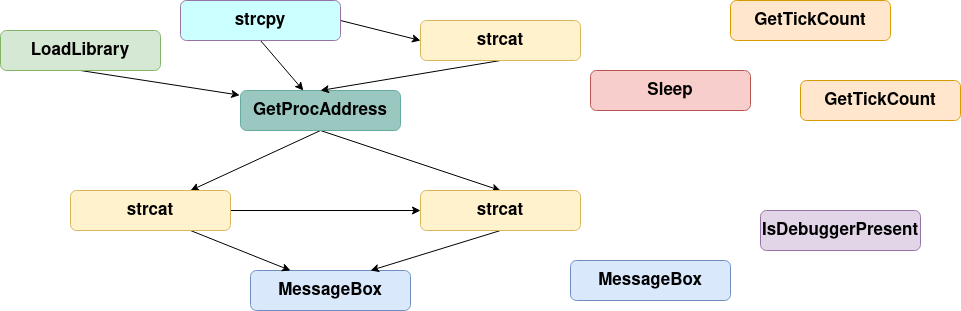